# **Preprocessing**

Image preprocessing may involve resizing, cropping (or selection of a region of interest (ROI)), denoising, itensity or color adjustments, with the purpose of improving the quality of the image for further processing. Here we will use the OpenCV library to perform some of these operations.

We will use hematological images displaying red blood cells and white blood cells
from a blood smear. The red blood cells are colored in red, and the white blood cells are
colored in blue / purple. The background is colored in white / gray. We will use the information
contained in the color channels to later segment the different cells.

![Hematology data](../data/images/hematology-collage.svg?1)

The data suffers from several imperfections. The resolution is relatively low,
the image is noisy, and displays image compression artifacts (blockiness), as 
the image was saved as a JPEG file. Furthermore, the blood cells are overlapping
with each other, which makes it difficult to distinguish them.

In this tutorial we will showcase different techniques to improve the quality
of the image, such as:
- Cropping
- Resizing
- Masking
- Denoising
- Enhancing contrast
- Sharpening
- (Removing artifacts)
- Color conversion
- Color correction / white balancing
- Background removal

Further reading: 
- Geeks for Geeks: Image Enhancement Techniques using OpenCV. [Link](https://www.geeksforgeeks.org/image-enhancement-techniques-using-opencv-python/)



---

## **Preparations**

Let's begin with some preparatory steps...

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload

%autoreload 2

# Enable vectorized output (for nicer plots)
%config InlineBackend.figure_formats = ["svg"]

# Inline backend configuration
%matplotlib inline

# Enable this line if you want to use the interactive widgets
# It requires the ipympl package to be installed.
#%matplotlib widget

import sys
sys.path.insert(0, "../")
import tools

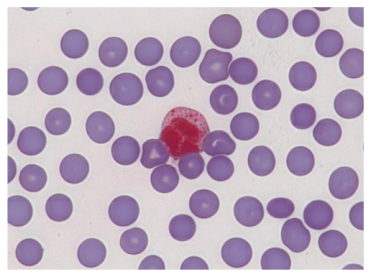

In [3]:
# Read in the data
img1 = cv.imread("../data/images/hematology-baso1.jpg", cv.IMREAD_COLOR)
img2 = cv.imread("../data/images/hematology-baso2.jpg", cv.IMREAD_COLOR)
img3 = cv.imread("../data/images/hematology-blast1.jpg", cv.IMREAD_COLOR)

plt.imshow(img1)
plt.axis("off");

Note: OpenCV uses BGR color space by default. However, Matplotlib uses RGB color space.
For consistency, we convert the images to RGB color space before displaying them.

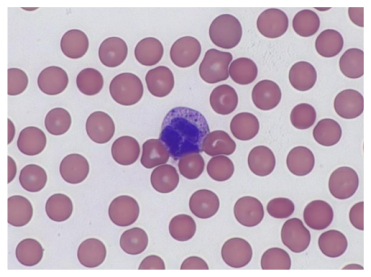

In [4]:
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

images = [img1, img2, img3]

# Let's display the images
plt.imshow(img1)
plt.axis("off");

In [5]:
img1.shape

(448, 608, 3)

In the following, we will use several functions to display images.
Before continuing, we quickly summarize some options we have.

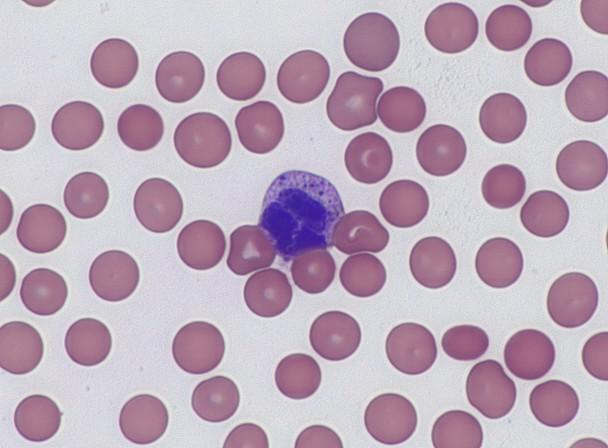

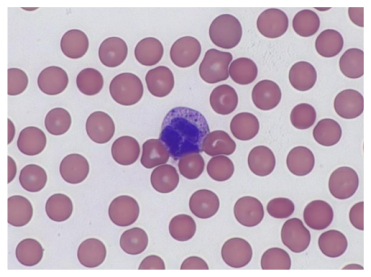

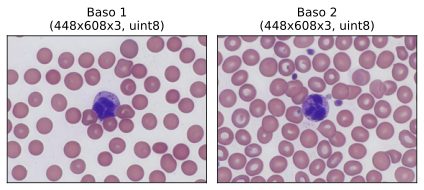

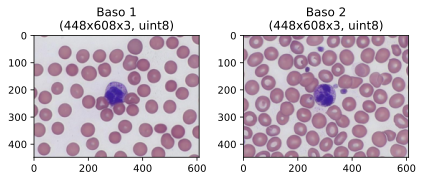

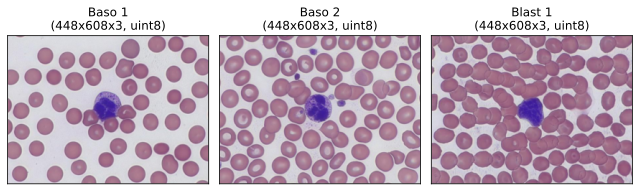

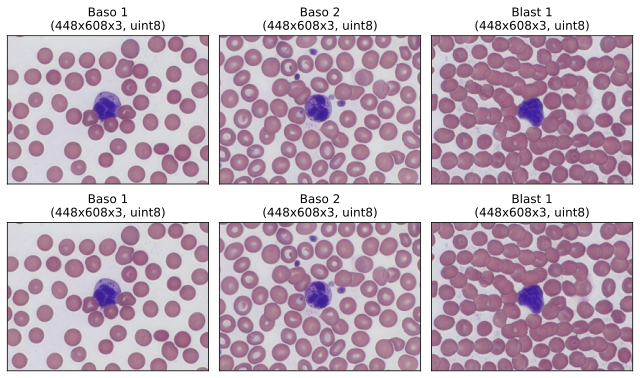

In [6]:
# Plain matplotlib
plt.imshow(img1)
plt.axis("off");   # Hide axes.

# Based on Jupyter's display() function.
tools.display_image(img1)

# Show pairs of images
tools.show_image_pair(img1, img2, title1="Baso 1", title2="Baso 2")

# Show axes coordinates
tools.show_image_pair(img1, img2, title1="Baso 1", title2="Baso 2", show_axes=True)

# Show a chain of images
tools.show_image_chain([img1, img2, img3], titles=["Baso 1", "Baso 2", "Blast 1"])

# Show a grid of images
images_tmp = images*2
titles = ["Baso 1", "Baso 2", "Blast 1"]
titles *= 2
tools.show_image_grid(images_tmp, titles=titles)

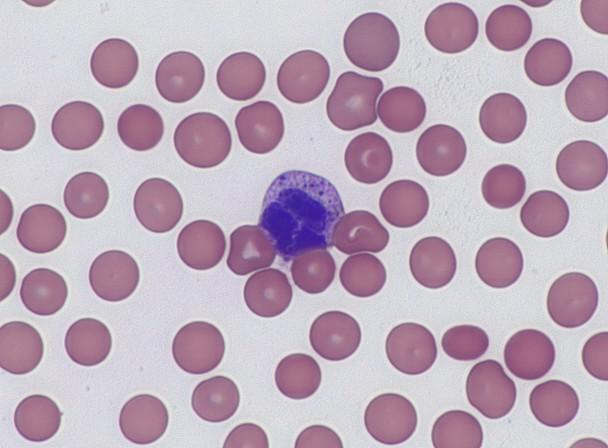

In [7]:
tools.display_image(img1)

---

## **Cropping**

Cropping an image means that we are selecting a rectangular region of interest (ROI) 
from the image. In Python, we can use the slicing operator to crop a region from an image.

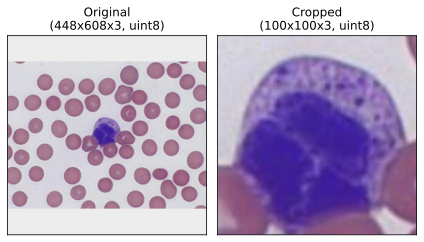

In [8]:
######################
###    EXERCISE    ###
######################

# Crop the image such that only the purple white blood cell is visible.
# Use the slicing operator to crop the image. 

# Specify the coordinates of the bounding box
xs, ys = 250, 160
h, w = 100, 100

# Crop the image using array slicing
# cropped_image = img1[startY:endY, startX:endX]

# Crop the image with the slicing operator
img1_crop = img1[ys:ys+h, xs:xs+w]

# Display the image
tools.show_image_pair(img1, img1_crop, title1="Original", title2="Cropped", 
                      shape=None, box_aspect=1)

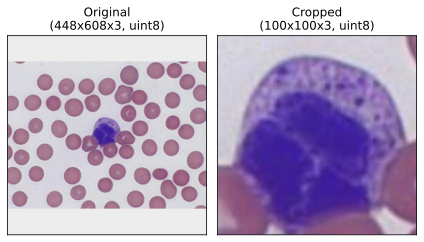

In [9]:
######################
###    SOLUTION    ###
######################

# Specify the coordinates of the bounding box
xs, ys = 250, 160
h, w = 100, 100

# Crop the image with the slicing operator
img1_crop = img1[ys:ys+h, xs:xs+w]

# Display the image
tools.show_image_pair(img1, img1_crop, title1="Original", title2="Cropped", 
                      shape=None, box_aspect=1)

---

## **Resizing**

We can use OpenCVs [`resize()`](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) method to resample an image to a certain size. Note 
that we can both downsample (make the image smaller), or upsample (make it bigger). Note the 
argument `interpolation` which specifies the interpolation method.

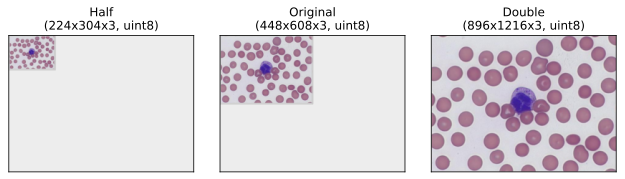

In [10]:
######################
###    EXCERISE    ###
######################

# Resize the image to half and double its size.
img1_half = cv.resize(img1, (round(img1.shape[1]*0.5), round(img1.shape[0]*0.5)))
img2_double = cv.resize(img1, (round(img1.shape[1]*2), round(img1.shape[0]*2)))

tools.show_image_chain(images=[img1_half, img1, img2_double], 
                       titles=["Half", "Original", "Double"])

---

## **Masking**

With masking, we can separate a cell from the background, remove an artifact, or label a region as uninsteresting by setting it to zero. 

A mask is a binary image (with values True or False). If the mask has the same shape
as the input image, it can be used to select pixels from the image and assign them 
to a new value. This is called masking.

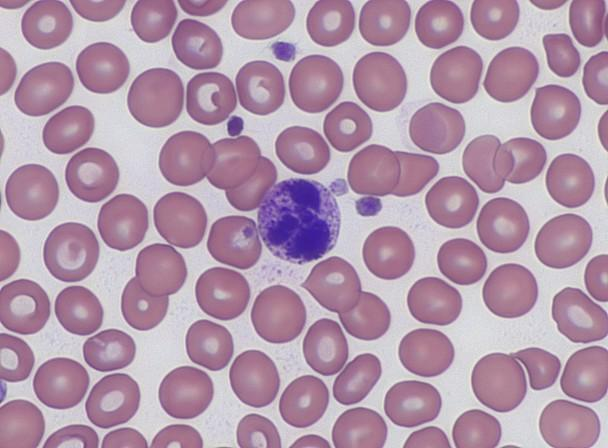

In [11]:
tools.display_image(img2)

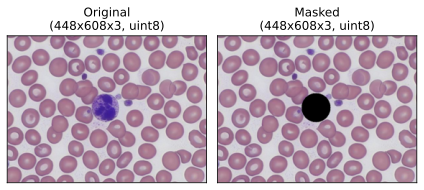

In [12]:
######################
###    EXCERISE    ###
######################

# 1. Create a circular mask with the same size as the image.
#    The center and the radius of the circle are provided below.
#    You can use cv.circle() or define your own function.
# 2. Apply the mask to the image img2.

# Center and radius of the circle
cx, cy = 220, 300
r = 44

# We use here a 2D binary mask
mask = img2.copy()

# Apply the mask to the RGB image, set all values to black
img2_masked = cv.circle(mask, (cy, cx), r, (0,0,0), -1)

# Visualize
tools.show_image_pair(img2, img2_masked, title1="Original", title2="Masked")

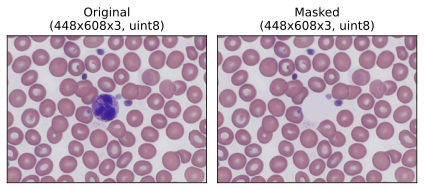

In [13]:
######################
###    SOLUTION    ###
######################

# 1. Create a circular mask with the same size as the image.
#    The center and the radius of the circle are provided below.
# 2. Apply the mask to the image img2.

# Center and radius of the circle
cx, cy = 220, 300
r = 44

# We use here a 2D binary mask
mask = np.zeros(img2.shape[:2], dtype=np.uint8)
mask = cv.circle(mask, (cy, cx), r, True, -1)
mask = mask.astype(bool)

img2_masked = img2.copy()
# Apply the mask to the RGB image, set all values to black.
img2_masked[mask] = 0
# ...or to some RGB color.
img2_masked[mask] = (209, 205, 216)

tools.show_image_pair(img2, img2_masked, title1="Original", title2="Masked")

In [14]:
img2.shape[:2]


(448, 608)

---

## **Denoising**

Several denoising methods are available. When denoising, one has to strike a balance between removing noise and preserving the details. The following methods are available in OpenCV:
- Gaussian blur
- Median blur
- Bilateral filter

Before continuing, read these OpenCV tutorials tutorials on [Smoothing](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html) and [Image denoising](https://docs.opencv.org/4.x/d5/d69/tutorial_py_non_local_means.html)


<!-- - Cropping
- Resizing
- Masking
- Denoising
- Enhancing contrast
- Sharpening
- (Removing artifacts)
- Color conversion
- Color correction / white balancing
- Background removal -->

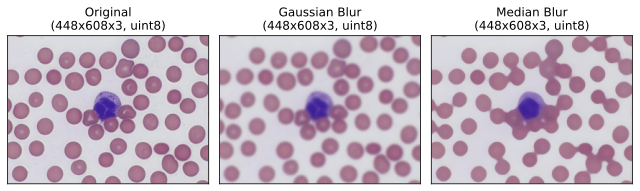

In [15]:
######################
###    EXCERISE    ###
######################

# 1. Apply Gaussian blur
# 2. Apply median blur
# 3. Apply bilateral filter (edge preserving)
# 4. Apply a means denoising filter (second link)

img1_gaussian = cv.GaussianBlur(img1, (21,21), 0)
img1_median_blur = cv.medianBlur(img1, 21)

tools.show_image_chain(images=[img1, img1_gaussian, img1_median_blur], titles=["Original", "Gaussian Blur", "Median Blur"])

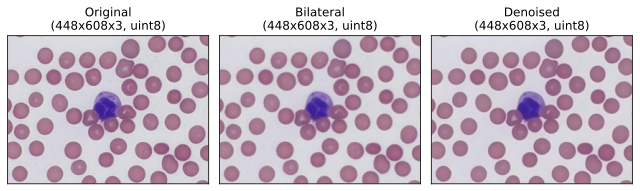

In [16]:
img1_bilateral = cv.bilateralFilter(img1, 9, 120, 120)
img1_denoise = cv.fastNlMeansDenoisingColored(img1, None, 10, 10, 7, 21)


tools.show_image_chain(images=[img1, img1_bilateral, img1_denoise], titles=["Original", "Bilateral", "Denoised"])

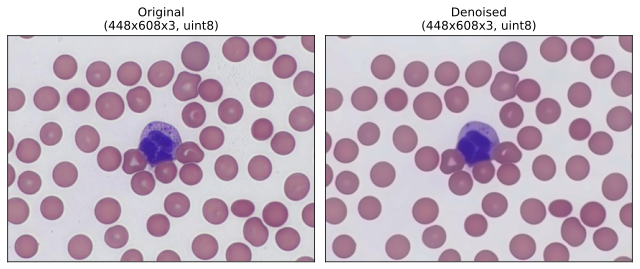

In [17]:
######################
###    SOLUTION    ###
######################

# 1. Apply Gaussian blur
# 2. Apply median blur
# 3. Apply bilateral filter (edge preserving)
# 4. Apply a means denoising filter (second link)
dst = cv.fastNlMeansDenoisingColored(img1, None,10,10,7,21)
tools.show_image_chain(images=[img1, dst], titles=["Original", "Denoised"])

---

## **Sharpening**


Sharpening refers to an operation that enhances the edges of an image.
Two methods are commonly used: unsharp masking (related, high-boost filtering) and 
Laplacian sharpening. The former is based on subtracting a blurred version of the
image from the original image, while the latter is based on applying a Laplacian
filter to the image. 

Unsharp masking:
1. Apply a Gaussian filter to the image.
2. Subtract the filtered image from the original image.
3. Add the result to the original image.

Laplacian Filter
- A second-order derivative operator/filter/mask. 
- Uses specific convolution kernels: [0 1 0; 1 -4 1; 0 1 0] or [-1 -1 -1; -1 8 -1; -1 -1 -1]
- Note, the sum of the values of this filter is 0. 
- Apply using `cv.conv2(img, kernel, "same")``

Further reading:
- [Stackoverflow](https://stackoverflow.com/questions/4993082)
- [Geeks for Geeks](https://www.geeksforgeeks.org/image-sharpening-using-laplacian-filter-and-high-boost-filtering-in-matlab/)


<!-- - Cropping
- Enhancing contrast
- (Removing artifacts)
- Color conversion
- Color correction / white balancing
- Background removal -->

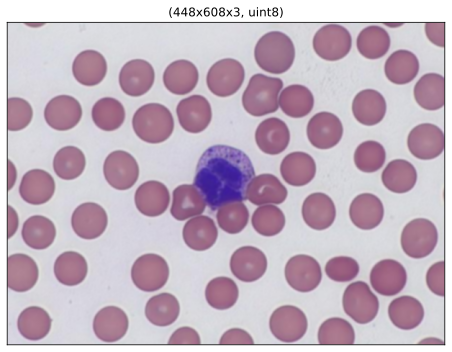

In [18]:
# unsharp
gaussian_blur = cv.GaussianBlur(img1, (5, 5), 0)
tools.show_image(gaussian_blur)


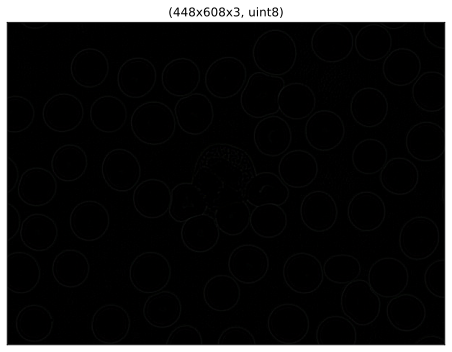

In [19]:
unsharp_mask = cv.subtract(img1, gaussian_blur)
tools.show_image(unsharp_mask)

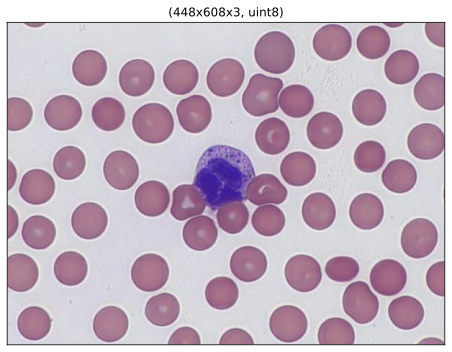

In [24]:
alpha = 1.5  # Scaling factor
sharpened_img = cv.add(img1, unsharp_mask)
tools.show_image(sharpened_img)

In [ ]:
######################
###    EXCERISE    ###
######################

# Implement one of the above methods to sharpen an image.
kernel = ...
img1_sharp = ...

tools.show_image_pair(img1, img1_sharp, 
                      title1= "Original", 
                      title2="Sharpened")

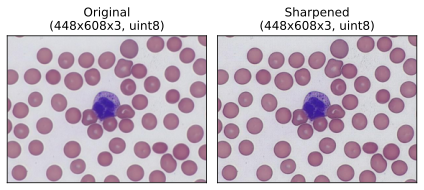

In [21]:
######################
###    SOLUTION    ###
######################

# Implement one of the above methods to sharpen an image.
kernel = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
kernel = np.asarray(kernel)
img1_sharp = cv.filter2D(img1, ddepth=-1, kernel=kernel)
img1_sharp = np.abs((img1-img1_sharp))
tools.show_image_pair(img1, img1_sharp, 
                      title1= "Original", 
                      title2="Sharpened")



---

## **Color / intensity enhancements**

Several methods based on histograms (histogram stretching, histogram equalization, or histogram matching) were demonstrated in the previous exercise.

For certain types of adjustments, it makes sense to switch the color space.
Notably, the HSV color space is often used to adjust the saturation and
brightness of an image. Other color spaces (such as the YGrYb, L*a*b or Luv) separate luma (intensity)
from chroma (color).


<!-- - Cropping
- Enhancing contrast
- (Removing artifacts)
- Color conversion
- Color correction / white balancing
- Background removal -->

In [ ]:
######################
###    EXERCISE    ###
######################

# Using the previous notebook 01-image-processing, 
# - increase the contrast in the image
# - increase the saturation
# - try to whiten the background, without losing the cells

---

## **Background removal**

Background removal can be achieved by searching for the background color (thresholding)
or background structure, or by using a segmentation technique to mask the foreground.

We may be able to segment the background in the next notebook. For now, however, we can try to remove the background using a pre-trained model. Let's take a look at the [RemBG package](https://github.com/danielgatis/rembg). It uses a model convolutional neural net published on huggingface (see [here](https://huggingface.co/spaces/KenjieDec/RemBG)) to remove the background from images. The model does not work well with all images (it fails for our hematological images). But it may work with your images. Just try it out.


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 171GB/s]


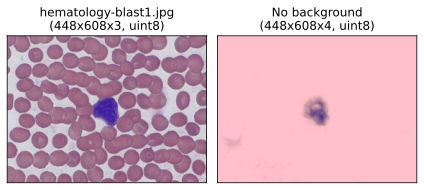

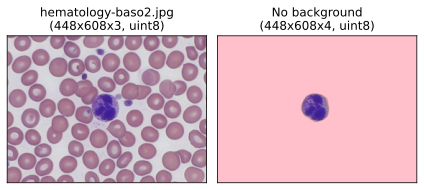

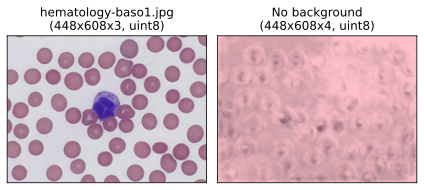

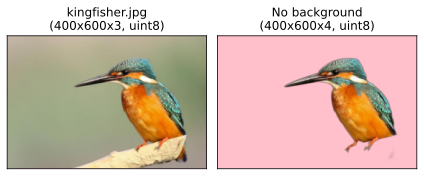

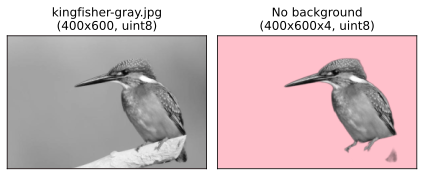

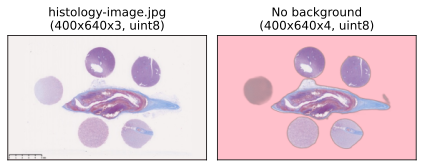

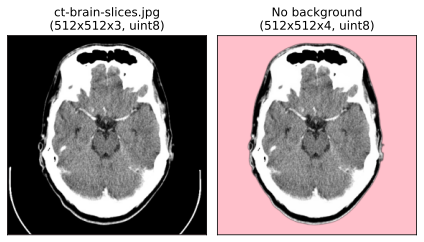

In [25]:
# If rembg is not installed yet, uncomment the following line:
#!pip install rembg

from rembg import remove 
from PIL import Image 

# # RemBG requires a Pillow image as input. Let's
# # convert the NumPy array into a Pillow image.
# img_pil = Image.fromarray(img2) 
# # RemBG does not work for our dataset img1.
# img_nobg = remove(img_pil) 
# tools.show_image_pair(np.asarray(img_pil), np.asarray(img_nobg), background_color="pink")

# But it works for other datasets.
files = [ "hematology-blast1.jpg",
          "hematology-baso2.jpg",
          "hematology-baso1.jpg",
          "kingfisher.jpg", 
          "kingfisher-gray.jpg", 
          "histology-image.jpg", 
          "ct-brain-slices.jpg" ]

for f in files:
    img_pil = Image.open("../data/images/"+f)
    img_nobg = remove(img_pil) 
    img_nobg.save("oink.png")
    tools.show_image_pair(np.asarray(img_pil), np.asarray(img_nobg), 
                          title1=f, title2="No background",
                          background_color="pink")  